In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

### FULL DATA

In [2]:
full_data = pd.read_csv('auto-mpg.csv')
full_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### ADJUSTED DATA

In [3]:
data = full_data[full_data['horsepower'] != "?"].iloc[:, :-1]
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [4]:
data['horsepower'] = data['horsepower'].astype('float64')

### DATA SUMMARY

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [47]:
data.iloc[:, [2, 3, 4, 5]].describe()

,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327
std,104.644004,38.491160,849.402560,2.758864
min,68.000000,46.000000,1613.000000,8.000000
25%,105.000000,75.000000,2225.250000,13.775000
50%,151.000000,93.500000,2803.500000,15.500000
75%,275.750000,126.000000,3614.750000,17.025000
max,455.000000,230.000000,5140.000000,24.800000


### HISTOGRAMS & QQ PLOTS

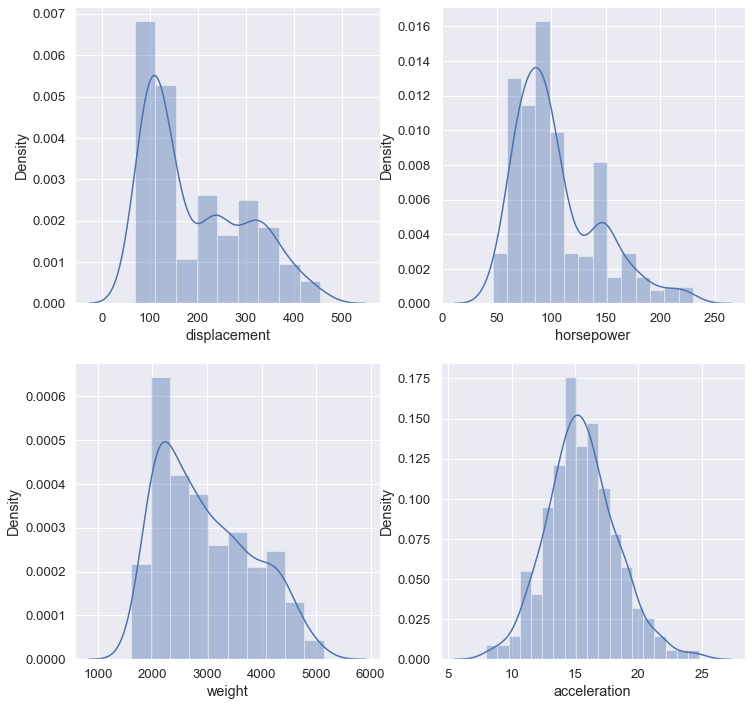

In [45]:
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.2)

count = 0
attr = ["displacement", "horsepower", "weight", "acceleration"]
f, axes = plt.subplots(2, 2, figsize=(12, 12))

for i in [0, 1]:
    for j in [0, 1]:
        attribute = attr[count]
        count += 1
        sns.distplot(data[attribute], ax=axes[i, j])

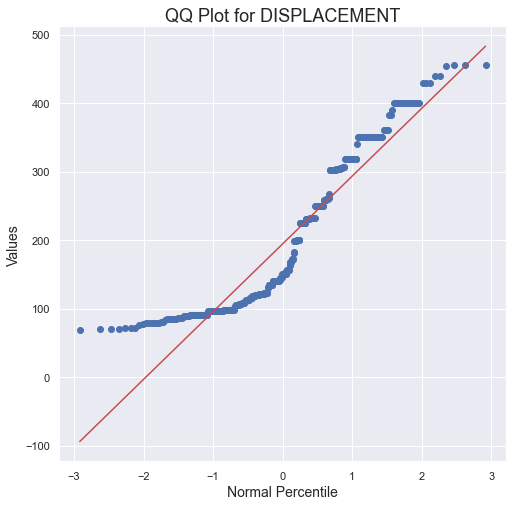

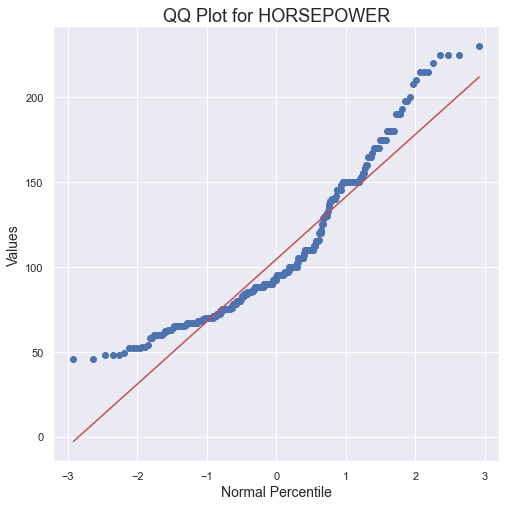

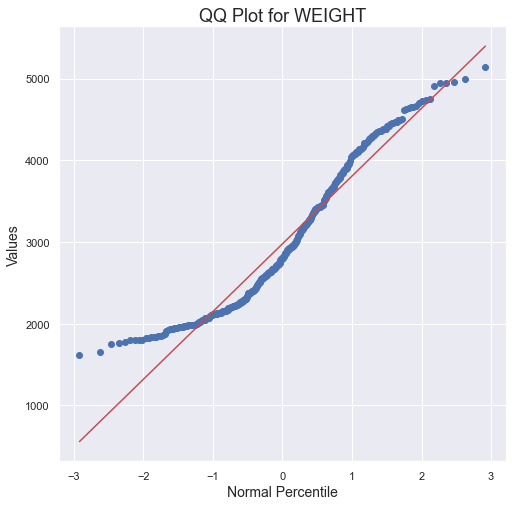

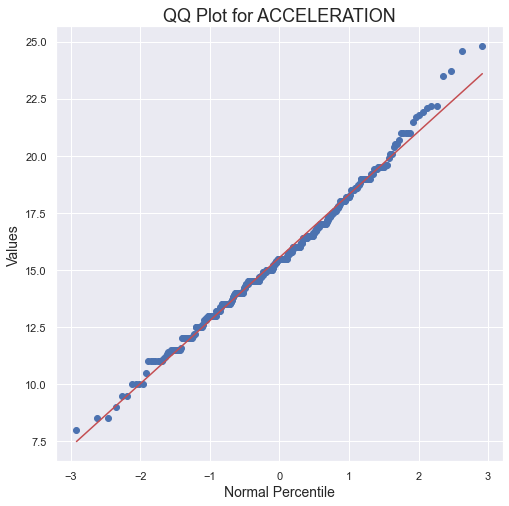

In [15]:
import scipy.stats as stats
import pylab as py

def display_qqplot(k, label):    
    stats.probplot(data.iloc[:, k], dist="norm", plot=py)
    py.title(f"QQ Plot for {label.upper()}", fontdict={'fontsize': 18})
    py.xlabel(xlabel='Normal Percentile', fontdict={'fontsize': 14})
    py.ylabel(ylabel='Values', fontdict={'fontsize': 14})
    py.show()

for k in [2, 3, 4, 5]:
    display_qqplot(k, data.columns[k])

### LINEAR REGRESSION FIT

In [8]:
features = data.columns
num_features = len(features) - 1
features, num_features

(Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model year', 'origin'],
       dtype='object'),
 7)

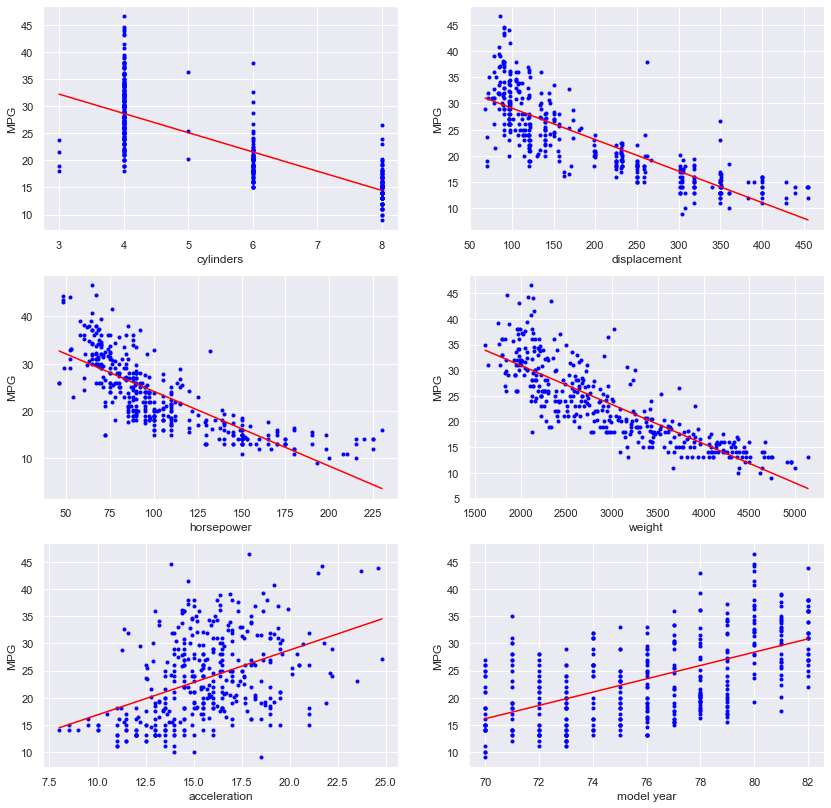

In [9]:
plt.figure(figsize=(14, 14))
for i in range(num_features - 1):
    plt.subplot(3, 2, i+1)
    x = data[features[i+1]]
    y = data['mpg']
    plt.plot(x, y, '.', color = 'blue')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(features[i+1])
    plt.ylabel('MPG')

### CORRELATION MATRIX BETWEEN PREDICTORS

In [71]:
predictors = data.iloc[:, 1:]
predictors

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


Text(0.5, 1.0, 'CORRELATION MATRIX')

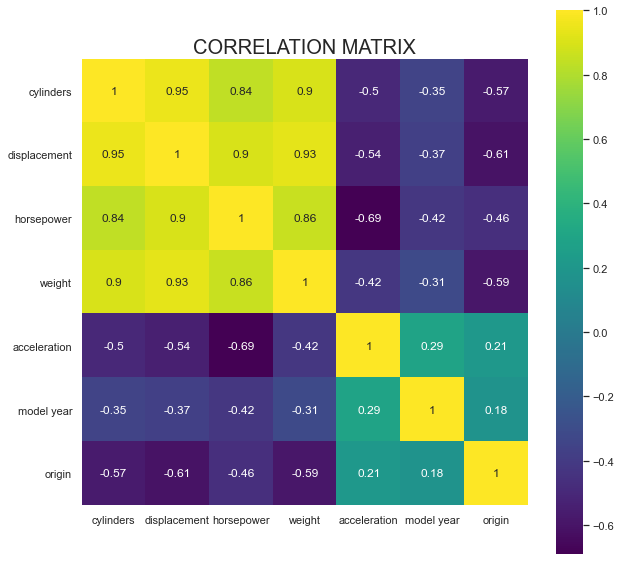

In [72]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(predictors.corr().round(2), square=True, cmap='viridis', annot=True)
plt.xticks(rotation='horizontal')
plt.title('CORRELATION MATRIX', fontsize = 20)